In [44]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from scipy import ndimage
from skimage import io
from PIL import Image

In [45]:
# cv2.imread("Content Images/Resized Images/Rodrigo Bentancur Images/Ro1drigo Bentancur (8).png").shape
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [52]:
train_dataset = train.flow_from_directory('C:/Users/susha/OneDrive/Desktop/AutomationProjectMock/Resized Images',target_size=(300,200), batch_size = 1, class_mode = "binary")
train_dataset.classes
train_dataset.class_indices

Found 178 images belonging to 2 classes.


{'Bryan Gil Tottenham Images': 0, 'Emerson Royal Tottenham Images': 1}

In [53]:
validation_dataset = train.flow_from_directory('C:/Users/susha/OneDrive/Desktop/AutomationProjectMock/Validation Images Resized', target_size=(300,200), batch_size = 1, class_mode = "binary")
validation_dataset.classes

Found 10 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [55]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(300,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    # tf.keras.layers.Dropout(.4, noise_shape=None, seed=None),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [56]:
model.compile(loss="binary_crossentropy",
             optimizer = Adam(learning_rate=0.001),
             metrics = ["accuracy"])

In [69]:
model_fit = model.fit(train_dataset, steps_per_epoch=2, epochs =100, validation_data= validation_dataset)

Epoch 1/100
2/2 [==============================] - 1s 449ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.8602 - val_accuracy: 0.8000
Epoch 2/100
2/2 [==============================] - 0s 302ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8023 - val_accuracy: 0.8000
Epoch 3/100
2/2 [==============================] - 0s 347ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 1.7560 - val_accuracy: 0.8000
Epoch 4/100
2/2 [==============================] - 0s 310ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.7196 - val_accuracy: 0.8000
Epoch 5/100
2/2 [==============================] - 0s 313ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 1.6924 - val_accuracy: 0.8000
Epoch 6/100
2/2 [==============================] - 0s 310ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.6705 - val_accuracy: 0.8000
Epoch 7/100
2/2 [==============================] - 0s 313ms/step - loss: 0.3628 - accuracy: 0.5000 - val_loss: 1.6700 - val_accuracy: 0.8000
Epoch 8/100
2

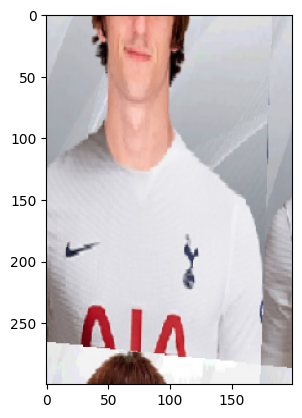

1/1 [==============================] - 0s 35ms/step
[[0.]]
This is Bryan Gil


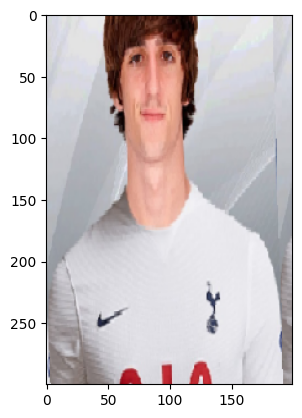

1/1 [==============================] - 0s 26ms/step
[[0.]]
This is Bryan Gil


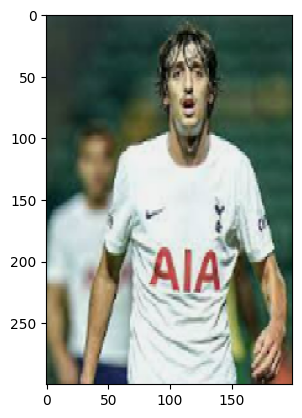

1/1 [==============================] - 0s 27ms/step
[[0.]]
This is Bryan Gil


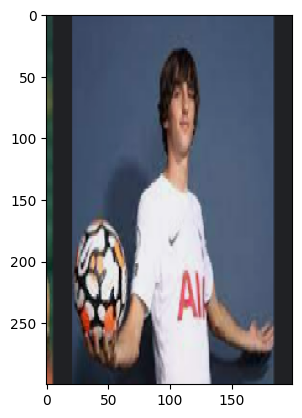

1/1 [==============================] - 0s 21ms/step
[[0.]]
This is Bryan Gil


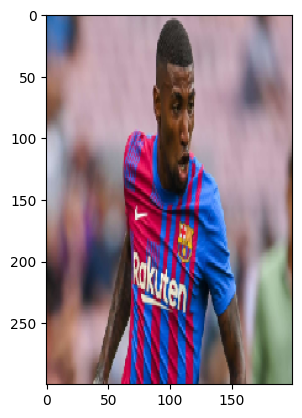

1/1 [==============================] - 0s 24ms/step
[[1.]]
This is Emerson Royal


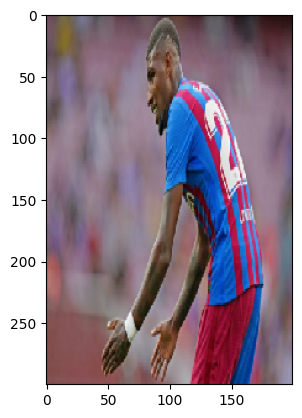

1/1 [==============================] - 0s 26ms/step
[[1.]]
This is Emerson Royal


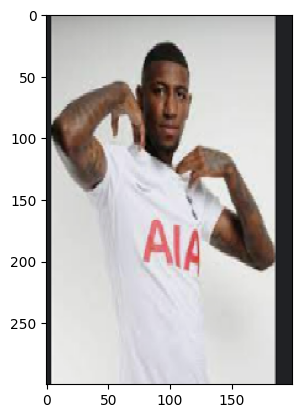

1/1 [==============================] - 0s 33ms/step
[[0.]]
This is Bryan Gil


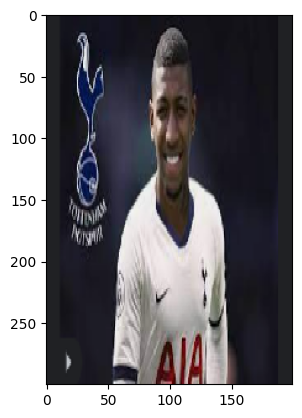

1/1 [==============================] - 0s 33ms/step
[[1.]]
This is Emerson Royal


In [67]:
dir_path = "C:/Users/susha/OneDrive/Desktop/Automation Project/Content Images/Test"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(300,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    if val<=0.1:
        print("This is Bryan Gil")
    else:
        print("This is Emerson Royal")

In [17]:
# ``````````````````This code generates images from different folders to one````````````````````````````

datagen = ImageDataGenerator(
                rotation_range=45,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='wrap'
            )
x = io.imread("Content Images/Resized Images/Bryan Gil Tottenham Images/Bryan Gil Tottenham (3).png")
x = x.reshape((1,)+x.shape)
i=0
# os.mkdir("C:\\Users\\susha\\OneDrive\\Desktop\\AutomationProjectMock\\Augmented")
os.mkdir("C:\\Users\\susha\\OneDrive\\Desktop\\AutomationProjectMock\\Augmented\\Testing2")
y = "C:\\Users\\susha\\OneDrive\\Desktop\\AutomationProjectMock\\Augmented\\Testing2"
for batch in datagen.flow_from_directory(directory='C:\\Users\\susha\\OneDrive\\Desktop\\AutomationProjectMock\\Validation Images Resized\\', batch_size=11, target_size=(256, 256), color_mode="rgb", save_to_dir=y, save_prefix='aug', save_format='png'):
    i += 1
    if i > 31:
        break 

Found 11 images belonging to 2 classes.


In [8]:

datagen = ImageDataGenerator(
                rotation_range=45,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1,
                horizontal_flip=True,
                fill_mode='reflect'
            )
image_directory = r'C:\Users\susha\OneDrive\Desktop\AutomationProjectMock\Resized Images\Bryan Gil Tottenham Images'

dataset = []

my_images = os.listdir(image_directory)
print(my_images)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'png'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((300,200))
        dataset.append(np.array(image))

x = np.array(dataset)

i = 0
for batch in datagen.flow(x, batch_size = 5,
                          save_to_dir='AutomationProjectMock\\Augmented\\Bryan Gil Tottenham Images', 
                          save_prefix='aug', 
                          save_format='png'):
    i += 1
    if i > 20:
        break 


['Bryan Gil Tottenham (1).png', 'Bryan Gil Tottenham (10).png', 'Bryan Gil Tottenham (11).png', 'Bryan Gil Tottenham (12).png', 'Bryan Gil Tottenham (13).png', 'Bryan Gil Tottenham (14).png', 'Bryan Gil Tottenham (15).png', 'Bryan Gil Tottenham (16).png', 'Bryan Gil Tottenham (17).png', 'Bryan Gil Tottenham (18).png', 'Bryan Gil Tottenham (19).png', 'Bryan Gil Tottenham (2).png', 'Bryan Gil Tottenham (20).png', 'Bryan Gil Tottenham (21).png', 'Bryan Gil Tottenham (22).png', 'Bryan Gil Tottenham (23).png', 'Bryan Gil Tottenham (24).png', 'Bryan Gil Tottenham (3).png', 'Bryan Gil Tottenham (4).png', 'Bryan Gil Tottenham (5).png', 'Bryan Gil Tottenham (6).png', 'Bryan Gil Tottenham (7).png', 'Bryan Gil Tottenham (8).png', 'Bryan Gil Tottenham (9).png']


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\susha\\OneDrive\\Desktop\\AutomationProjectMock\\Resized Images\\Bryan Gil Tottenham ImagesBryan Gil Tottenham (1).png'